In [ ]:
!pip install pandas scikit-learn matplotlib seaborn # Ya las tengo instaladas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



In [4]:
# URL del conjunto de datos Wine en GitHub
url = "https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv"

# Cargar el conjunto de datos
df = pd.read_csv(url)

# Mostrar las primeras filas del conjunto de datos
df.head()



,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Separar las características y las etiquetas
X = df.drop('Wine', axis=1)  # Asegúrate de que la columna 'Wine' contiene las etiquetas
y = df['Wine']



In [6]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# este warning no es importante

/home/andres/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# Reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



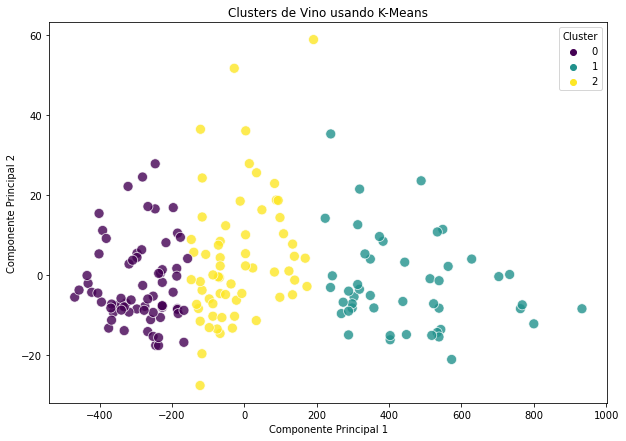

In [8]:
# Visualización de los clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, palette='viridis', s=100, alpha=0.8)
plt.title('Clusters de Vino usando K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()